## Final Project Submission
### Please fill out:

Student name: David Mwiti

Student pace: part time

Scheduled project review date/time: 14/12/2022

Instructor name: Rose Delilah

Blog post URL:

## Data Description

In this dataset, the KC_House data set, we have to predict the sales price of houses. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains 20 house features plus the price, along with 21597 records.

The description for the 20 features is as follows:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load our data set into a data frame

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Preparation

In [4]:
# Create a copy of the dataframe 
housing_df = df.copy()

* Before doing anything we should first know about the dataset what it contains what are its features and what data types we have

In [5]:
# shape of dataframe
housing_df.shape

(21597, 21)

In [6]:
#checking the datatypes
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

we have data in the wrong format/type like the dates and I will have to  correct that to the proper datetime type intead of object/string type

In [7]:
#changing date column into date type using pandas

housing_df['date']=pd.to_datetime(housing_df["date"])

In [8]:
housing_df['price'] = housing_df['price'].map(int)

In [9]:
#checking the data types
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  int64         
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

* Next we check for and deal with missing values in our data set

In [10]:
# getting the sum total of mising values in our data frame
housing_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

* there are 3 columns with missing values. I decided to fill ‘yr_renovated’ NaNs with 0 meaning that these houses did not get renovated, fill the ‘waterfront’ NaNs with 0 (which matched the majority of other values in the column, and indicates ‘no waterfront’), and drop the mising values in ‘view’ column.

In [11]:
housing_df['yr_renovated'].fillna(0, inplace=True)
housing_df['waterfront'].fillna(0, inplace=True)

housing_df.dropna(inplace=True)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21534 non-null  int64         
 1   date           21534 non-null  datetime64[ns]
 2   price          21534 non-null  int64         
 3   bedrooms       21534 non-null  int64         
 4   bathrooms      21534 non-null  float64       
 5   sqft_living    21534 non-null  int64         
 6   sqft_lot       21534 non-null  int64         
 7   floors         21534 non-null  float64       
 8   waterfront     21534 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21534 non-null  int64         
 11  grade          21534 non-null  int64         
 12  sqft_above     21534 non-null  int64         
 13  sqft_basement  21534 non-null  object        
 14  yr_built       21534 non-null  int64         
 15  yr_renovated   2153

* Describe the dataframe to know the mean, minumum, ,maximum, standard deviation, percentiles.

In [12]:
# displaying our values in float to prevent scientific notation 

pd.set_option('display.float_format', lambda X: '%.5F'% X)
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21534.00000,4582351016.28703,2876779096.96191,1000102.00000,2123212130.25000,3904945195.00000,7312175032.50000,9900000190.00000
price,21534.00000,540057.66383,366059.58123,78000.00000,322000.00000,450000.00000,645000.00000,7700000.00000
bedrooms,21534.00000,3.37304,0.92641,1.00000,3.00000,3.00000,4.00000,33.00000
bathrooms,21534.00000,2.11571,0.76860,0.50000,1.75000,2.25000,2.50000,8.00000
sqft_living,21534.00000,2079.82785,917.44652,370.00000,1430.00000,1910.00000,2550.00000,13540.00000
sqft_lot,21534.00000,15090.59636,41380.20986,520.00000,5040.00000,7617.00000,10687.75000,1651359.00000
floors,21534.00000,1.49413,0.53981,1.00000,1.00000,1.50000,2.00000,3.50000
waterfront,21534.00000,0.00673,0.08178,0.00000,0.00000,0.00000,0.00000,1.00000
view,21534.00000,0.23386,0.76569,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21534.00000,3.40972,0.65065,1.00000,3.00000,3.00000,4.00000,5.00000


Now that we have a basic description of our data, we will drop some columns deemed unnecessary based on correlation values

In [13]:
housing_df.corr().abs().T

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00000,0.01739,0.00099,0.00497,0.01238,0.13206,0.01857,0.00426,0.01159,0.02394,0.00833,0.01097,0.02161,0.01047,0.00803,0.00200,0.02064,0.00271,0.13861
price,0.01739,1.00000,0.30806,0.52505,0.70159,0.09034,0.25705,0.25922,0.39573,0.03539,0.66831,0.60570,0.05427,0.11798,0.05362,0.30787,0.02242,0.58530,0.08319
bedrooms,0.00099,0.30806,1.00000,0.51437,0.57793,0.03273,0.17739,0.00373,0.07852,0.02640,0.35610,0.47915,0.15546,0.01780,0.15399,0.01041,0.13232,0.39287,0.03095
bathrooms,0.00497,0.52505,0.51437,1.00000,0.75528,0.08892,0.50228,0.06112,0.18645,0.12668,0.66531,0.68617,0.50756,0.04696,0.20444,0.02449,0.22503,0.56914,0.08885
sqft_living,0.01238,0.70159,0.57793,0.75528,1.00000,0.17377,0.35353,0.10198,0.28253,0.05978,0.76240,0.87655,0.31822,0.05087,0.19984,0.05238,0.24186,0.75621,0.18480
sqft_lot,0.13206,0.09034,0.03273,0.08892,0.17377,1.00000,0.00502,0.02146,0.07530,0.00838,0.11512,0.18432,0.05265,0.00509,0.12985,0.08514,0.23014,0.14514,0.71710
floors,0.01857,0.25705,0.17739,0.50228,0.35353,0.00502,1.00000,0.02036,0.02844,0.26414,0.45869,0.52337,0.48941,0.00332,0.05897,0.04942,0.12533,0.27918,0.01085
waterfront,0.00426,0.25922,0.00373,0.06112,0.10198,0.02146,0.02036,1.00000,0.38200,0.01622,0.08119,0.06993,0.02500,0.07433,0.02949,0.01228,0.03784,0.08235,0.03060
view,0.01159,0.39573,0.07852,0.18645,0.28253,0.07530,0.02844,0.38200,1.00000,0.04573,0.24973,0.16630,0.05456,0.09032,0.08528,0.00614,0.07789,0.27956,0.07333
condition,0.02394,0.03539,0.02640,0.12668,0.05978,0.00838,0.26414,0.01622,0.04573,1.00000,0.14733,0.15883,0.36140,0.05573,0.00213,0.01559,0.10548,0.09317,0.00270


* By observing the data, we can see that the price is dependent on various features like bedrooms, bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. At this poin there are no missing values, which helps us creating better model, however it would be great to reduce the number of columns for beter visualizations.

In [14]:
#create a list of meaningfully continuous x variables
columns = ['price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'grade', 'view', 'condition',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']

#update dataframe to only include the above variables
housing_clean = housing_df[columns]
housing_clean.head()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,view,condition,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900,3,1.00000,1180,5650,1.00000,7,0.00000,3,1180,1955,1340,5650
1,538000,3,2.25000,2570,7242,2.00000,7,0.00000,3,2170,1951,1690,7639
2,180000,2,1.00000,770,10000,1.00000,6,0.00000,3,770,1933,2720,8062
3,604000,4,3.00000,1960,5000,1.00000,7,0.00000,5,1050,1965,1360,5000
4,510000,3,2.00000,1680,8080,1.00000,8,0.00000,3,1680,1987,1800,7503


## Visualizing our data in Graphs/plots for a better understanding


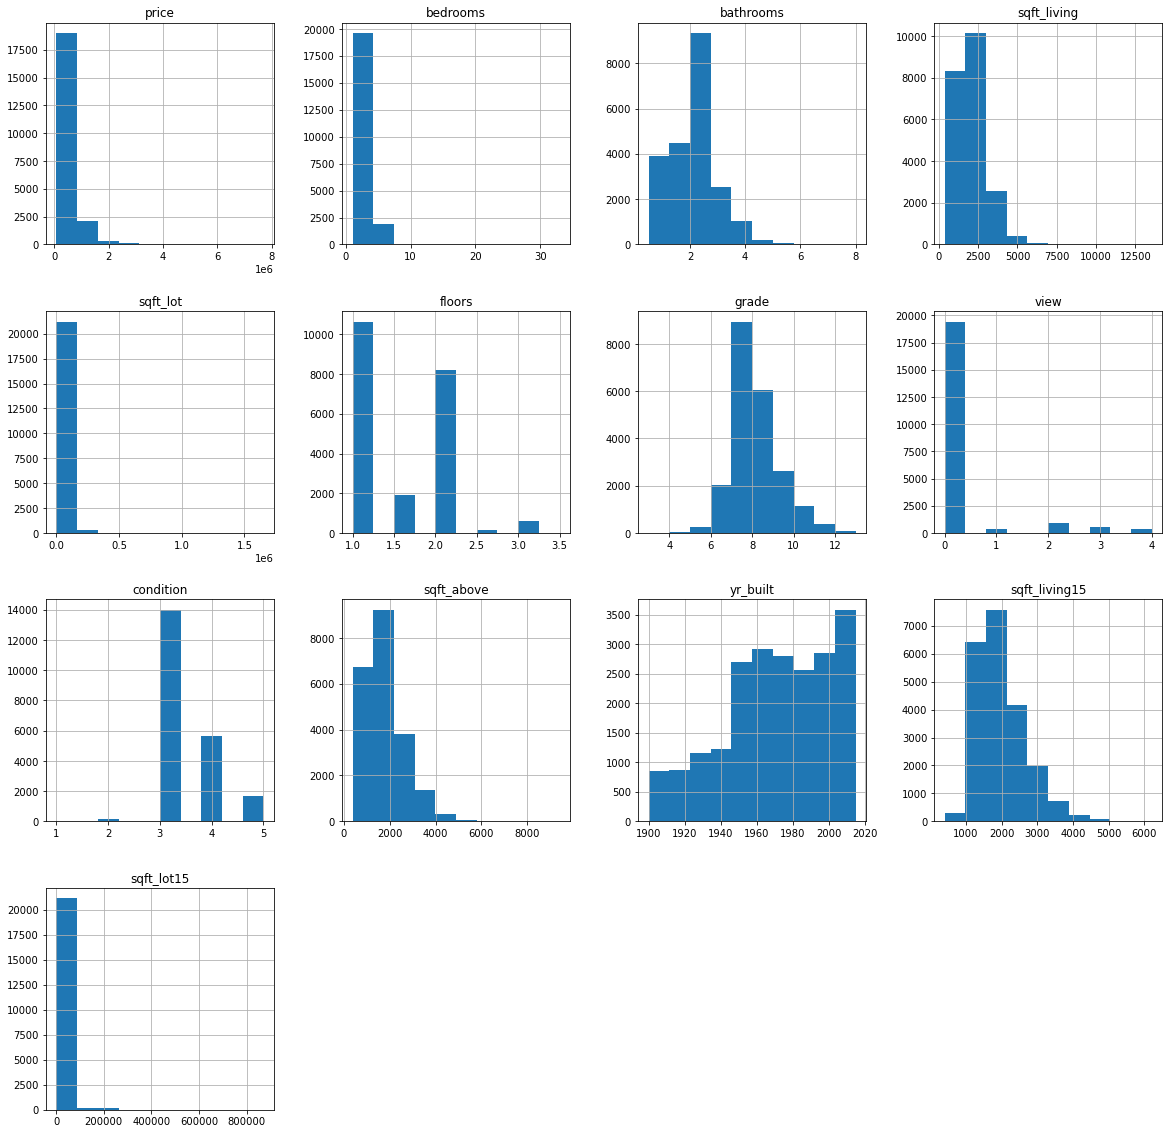

In [15]:
# checkingthe distribution of our dataset
housing_clean.hist(figsize=(20,20));

* most of our variables do not follow a normal distribution, however regression does not require features to be normally distributed. we'll look at this later

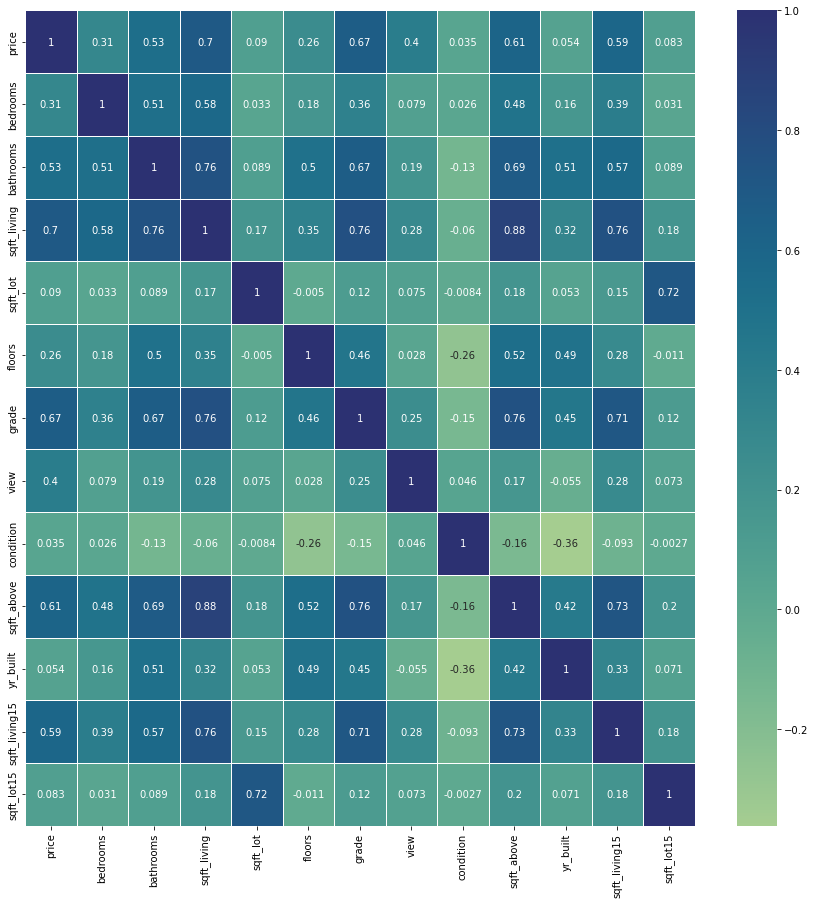

In [16]:
##heatmap for our new data frame for correlation

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(housing_clean.corr(), annot=True, cmap='crest', linewidths=.5)

# save the plot as an image
plt.savefig('correlation Heatmap.png')

* This heatmap identifies the correlations between the features which help us in identifying how the features are dependent on each other which cannot be known by just seeing the data. For instance, most of the variables related to the size of homes (e.g. sqft, number of rooms) are highly correlated with each other. 
* we can also see that in the dataset, there are several features with moderately strong correlations. Sqft_living, grade, sqft_living15, sqft_above and bathrooms have the highest correlations to the price.

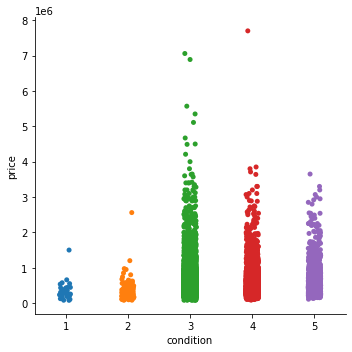

In [17]:
#catplot for condition and price
sns.catplot(x='condition',y='price',data=housing_clean)

# save the plot as an image
plt.savefig('catplot.png')

In [18]:
housing_clean['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

* Prices of the houses are affected by the condition of the house. 
* We can also see that most of the houses sold are of condition 3 - 5,  with 3 having a higher price range as well as more 
sales

This can be attriibuted to the law of demand and supply. meaning houses in condition 3 may have a higher market demand

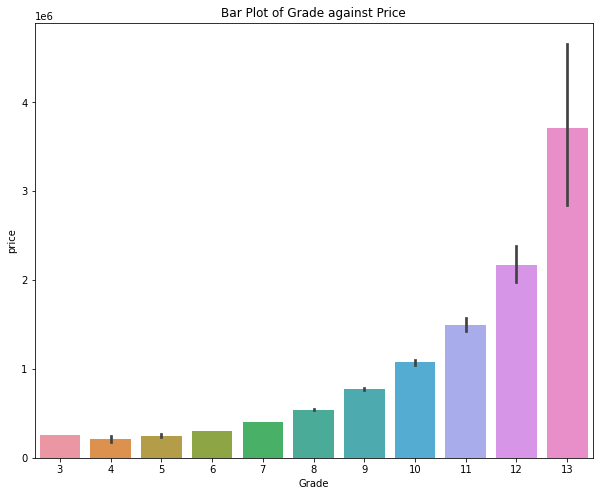

In [19]:

plt.figure(figsize=(10,8))
sns.barplot(x="grade", y="price", data=housing_clean)
# Add labels and title
plt.xlabel("Grade")
plt.ylabel("price")
plt.title("Bar Plot of Grade against Price")

# Show the plot
plt.show()


* from the above plot, it is clear that the grading system affects the prices of the houses in king county

In [20]:
housing_clean['grade'].value_counts()

7     8948
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [21]:
 ['price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'grade', 'view', 'condition',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'view',
 'condition',
 'sqft_above',
 'yr_built',
 'sqft_living15',
 'sqft_lot15']

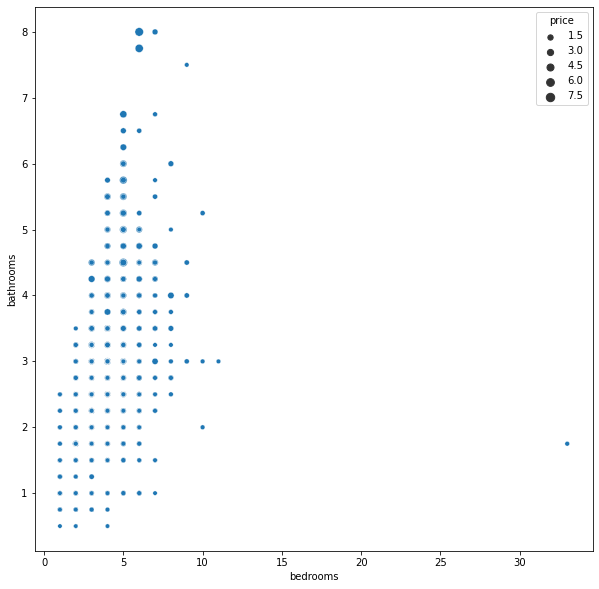

In [22]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=housing_clean['bedrooms'], y=housing_clean['bathrooms'], size=housing_clean['price'])
plt.show()

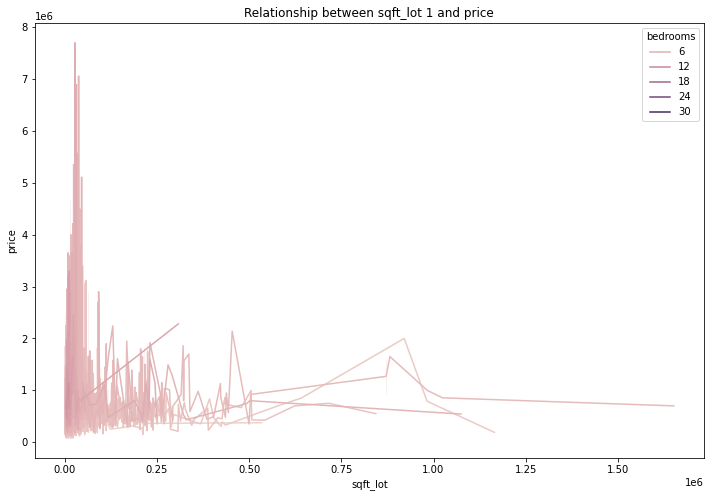

In [23]:
# relationship between sqft_lot and price

fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
sns.lineplot(x='sqft_lot', y='price', hue='bedrooms', data=housing_clean)

plt.title('Relationship between sqft_lot 1 and price')
plt.xlabel('sqft_lot')
plt.ylabel('price')

plt.show()

## Modeling

To create a simple linear regression model for each of the chosen explanatory variables that satisfy linearity, we would first need to perform a series of tests to determine if the variables are suitable for linear regression. This would involve checking for linearity, normality, homoscedasticity, and multicollinearity.
If the variables pass these tests, we could then proceed to fit a simple linear regression model to the data using the chosen explanatory variable as the independent variable and the target variable as the dependent variable.

In addition to checking for these assumptions, we will also look at two values in the model summary:

* R-squared: This value tells us what proportion of the variability of y around its mean can be explained by the model. It can fall between 0 and 1, and a higher r-squared value indicates higher predictive power.
* p-value: The null hypothesis for linear regression is that there is no relationship between the chosen explanatory variables and the response variable. Therefore, we want the model to have a p-value lower than .05 so we can reject the null hypothesis.

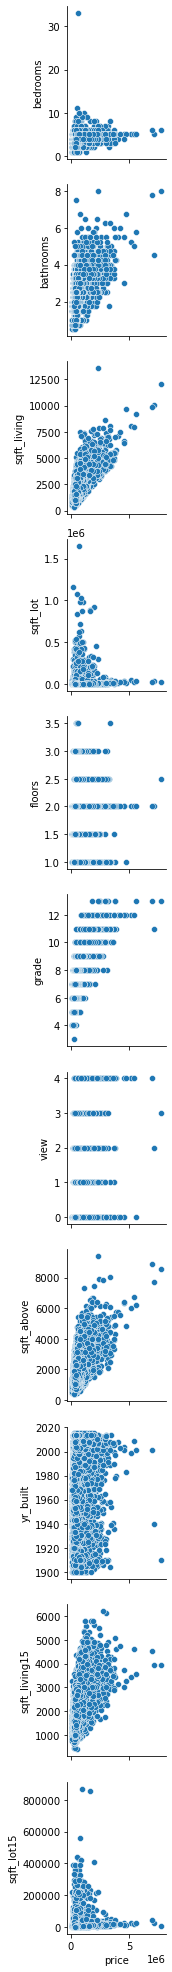

In [24]:
# checking the linear relationship of our features with the price of the houses

y= ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'view',
    'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']
sns.pairplot(housing_clean, x_vars=['price'], y_vars=y)

plt.tight_layout()
plt.show()

* Here we can see that The 'view', 'floors', and 'bedrooms' variables do not have a clear linear relationship with house price. Sqft living has a stronger linear relationship with price than sqft above.

Next we create a function that creates a diagnostic summary for a given model. It includes the r-squared and p-value for the model, as well as visualizations of the residuals including a histogram, QQ plot, and residuals vs the independent variable. The input parameters for the function include the model, the independent variable (x), the name of the independent variable, and the dependent variable (y).

In [25]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='DejaVu Sans')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;

* as states, the function takes in a model, predictor variable, name of predictor variable, and response variable. It creates a figure with three subplots showing the residuals histogram, QQ plot, and residuals vs predictor variable. It also displays the r-squared and p-value of the model.

### sqft_livingsquare - footage of the home

In [26]:
#Fit the linear regression model using sqft_living as the predictor variable
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=df).fit()

#Perform diagnostic tests on the model
model_diagnostic(sqft_living_model, sqft_living, 'sqft_living', price)

NameError: name 'sqft_living' is not defined

* For our model to meet the assumptions, we can use Log-transformation, which can often help when these assumptions are not met. Let's update the values to their natural logs and re-check the assumptions.

In [ ]:
# using Numppy to change values to their natural logs
housing_clean['price'] = np.log(housing_clean['price'])
housing_clean['sqft_living'] = np.log(housing_clean['sqft_living'])


#Fit the linear regression model and Perform diagnostic tests on the model
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=housing_clean).fit()
model_diagnostic(sqft_living_model, housing_clean['sqft_living'], 'sqft_living', price)

* The adjusted R-squared value of the model is 0.44, which indicates that after adjusting variables in the model, 44% of the variance in the dependent variable (price) is explained by the independent variable (sqft_living).
* The p-value of the model is 0.000, which indicates that the model is statistically significant at the 0.05 level.
* Most of the residuals of the model are normally distributed, which indicates that the assumptions of the model are met.

Overall, the sqft_living model is a good fit for predicting the dependent variable (price) based on the independent variable (sqft_living)

## Number of Bathrooms


In [ ]:
#Fit the linear regression model using sqft_living as the predictor variable
f = "bathrooms~price"
bath_model = smf.ols(formula=f, data=df).fit()

#Perform diagnostic tests on the model
model_diagnostic(bath_model, bath, 'Bathrooms', price)

* The R-squared value of the model is 0.28, which indicates that 28% of the variance in the dependent variable (price) is explained by the independent variable (Bathrooms).
* The p-value of the model is 0.000, which indicates that the model is statistically significant at the 0.05 level.
* Most of the residuals of the model are normally distributed, which indicates that the assumptions of the model are met.

Overall, the bath model is a good fit for predicting the dependent variable (price) based on the independent variable (bathroom)

# Grade

In [ ]:
#Fit the linear regression model using sqft_living as the predictor variable
f = 'grade~price'
grade_model = smf.ols(formula=f, data=housing_clean).fit()

#Perform diagnostic tests on the model
model_diagnostic(grade_model, housing_clean['grade'], 'Grade', price)

* The R-squared value of the model is 0.48, which indicates that 49% of the variance in the dependent variable (price) is explained by the independent variable (grade).
* The p-value of the model is 0.000, which indicates that the model is statistically significant at the 0.05 level.
* Most of the residuals of the model are normally distributed, which indicates that the assumptions of the model are met.
Overall, the grade_model is a good fit for predicting the dependent variable (price) based on the independent variable (grade)

## sqft_above - square footage of house apart from basement

In [ ]:
#Fit the linear regression model using sqft_living as the predictor variable
f = 'sqft_above~price'
grade_model = smf.ols(formula=f, data=housing_clean).fit()

#Perform diagnostic tests on the model
model_diagnostic(grade_model, housing_clean['sqft_above'], 'sqft_above', price)

* For our model to meet the assumptions, we can use Log-transformation, which can often help when these assumptions are not met. Let's update the values to their natural logs and re-check the assumptions.

In [ ]:
# using Numppy to change values to their natural logs
housing_clean['price'] = np.log(housing_clean['price'])
housing_clean['sqft_above'] = np.log(housing_clean['sqft_above'])


#Fit the linear regression model and Perform diagnostic tests on the model
f = 'price~sqft_above'
sqft_living_model = smf.ols(formula=f, data=housing_clean).fit()
model_diagnostic(sqft_living_model, housing_clean['sqft_above'], 'sqft_above', price)

* with the adjusted R-squared value of the model is 0.34, which indicates that after adjusting variables in the model, 34% of the variance in the dependent variable (price) is explained by the independent variable (sqft_living).
* The p-value of the model is 0.000, which indicates that the model is statistically significant at the 0.05 level.
* the residuals of the model are normally distributed, which indicates that the assumptions of the model are met.

Overall, the sqft_above model is a good fit for predicting the dependent variable (price) based on the independent variable (sqft_above)

## Multiple Regression

### Modeling

For the first multiple regression model, we'll include the four variables that had the highest correlations with price without violating the multicollinearity assumption:

In [ ]:
Model = smf.ols(formula="price ~ grade + bathrooms + sqft_living15  + sqft_living", data=housing_clean).fit()
Model.summary()

The condition number is a measure of how sensitive the model is to changes in the data. A large condition number indicates that the model is highly sensitive to changes in the data, which can cause problems with the model's accuracy and stability. In this case, the large condition number of 1.48e+05 indicates that there is a high degree of multicollinearity between the independent variables in the model. This means that the variables are highly correlated with each other, which can cause problems with the model's accuracy and stability. In order to improve the model, it may be necessary to address the multicollinearity issue by removing or combining some of the independent variables.

* R-squared: The model now accounts for only 48% of variability in price.

* p-value: All of the p-values round to 0.

* All that remains, then, is to check the normality of the model's residuals. We'll create a QQ-plot and confirm that the residuals fall along a straight line.

The residuals QQ plot is a graphical tool for assessing whether the residuals of a model follow a normal distribution. In this case, the QQ plot should show the quantiles of the residuals on the y-axis and the quantiles of the standard normal distribution on the x-axis. If the residuals are normally distributed, the points in the QQ plot should fall roughly on a straight line with slope 45 degrees.

In [ ]:
residuals = Model.resid
# QQ plot generation
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()

* almost all of the datapoints fall along a straight line in this QQ-plot, we can consider the normality assumption satisfied

by using our model, we can say that Grade, sqft_living, sqft_living15 and bathrooms are the best fit for a multiple regression model. These features are highly correlated with price, have relatively low multicollinearity, and can together account for more than half of the variability of price. All multiple regression assumptions are satisfied with these features included.

## Model Validation
The next step is cross-validation, Cross-validation is a technique for evaluating the performance of a machine learning model on unseen data. It is commonly used in the field of supervised learning, where the goal is to train a model to make predictions on new, unseen data. 

In cross-validation, the available data is split into two sets: a training set and a validation set. The model is first trained on the training set, and then its performance is evaluated on the validation set. This process is repeated a number of times, using different splits of the data each time, in order to get an average measure of the model's performance. We'll use sklearn's train_test_split function to split the data into two subsets: 

Below, we create train and test data for the x and y variables, use the x subsets to predict new y values, and then calculate the distance between these and the actual y-values. Finally, we use the mean_squared_error function to calculate the MSE for both subsets.

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(housing_clean, housing_clean.price)

#training
train, test = train_test_split(housing_clean,test_size=.25,shuffle=True)

In [ ]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [ ]:
#fit the data 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
#use the model to predict y values for the test and train data
y_pred_train = Model.predict(X_train)
y_pred_test = Model.predict(X_test)

Now we calculate the mean squared error (MSE) of a model on the training and test sets. The MSE is a measure of how well a model fits the data, and is defined as the average squared difference between the predicted values and the true values.

In the code, the MSE for the training set is calculated by first taking the difference between the true target labels (y_train) and the predicted values (y_pred_train). This difference is then squared, and the mean of the squared differences is calculated. The MSE for the test set is calculated in the same way, using the y_test and y_pred_test arrays.

Once the MSE has been calculated for the training and test sets, it can be used to evaluate the performance of the model. A low MSE indicates that the model is able to make accurate predictions on the data, while a high MSE indicates that the model is not fitting the data well. In general, you want to minimize the MSE of your model on the test set in order to make the best predictions.

In [ ]:
train_mse = np.mean(y_train-y_pred_train)**2
test_mse = np.mean(y_test-y_pred_test)**2

train_r2 = r2_score(train['price'], Model.predict(train))
test_r2 = r2_score(test['price'], Model.predict(test))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print(f'R-Squared Train = {round(train_r2,2)}')
print(f'R-Squared Test = {round(test_r2,2)}')

The mean squared error (MSE) is a measure of the quality of a predictive model. It is used to compare the difference between the predicted values of a model and the actual values of the observed data. The lower the MSE, the better the model is at making accurate predictions.

In our model, the MSE for the train data is 1.8461276693059779e-10 and the MSE for the test data is 1.6611034390766247e-09. This indicates that the model is making relatively accurate predictions on the train data, but not as accurate predictions on the test data.

The R-squared value is another measure of the quality of a predictive model. It represents the proportion of the variance in the dependent variable that is explained by the model. A value of 0.54 for the train data and 0.55 for the test data indicates that the model is only explaining about 54-55% of the variance in the dependent variable. This is not a particularly strong model, however it gets the job done.


## Conclusion

The three factors that together best predict a home's price in King County are square footage, grade, and bathrooms. Homeowners who want to sell their properties for more money should concentrate on increasing square footage and raising the standard of construction. Homeowners should think about adding more bathrooms while increasing their square footage because, according to this data, the number of bathrooms is positively correlated with pricing.

The model does have certain drawbacks, such as the requirement that all new data used with the model go through a similar pretreatment step because some of the variables have to be log-transformed to satisfy regression assumptions.

The model may perfom well under extreem values given tha outliers were included in our calculations